<a href="https://colab.research.google.com/github/JessieAnce/SCT_ML_02/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

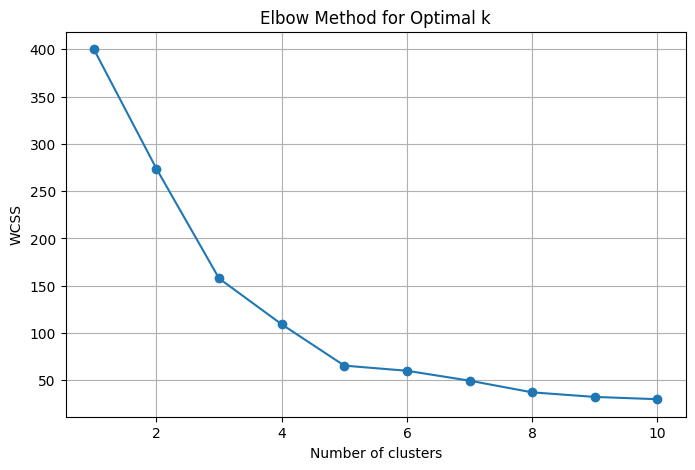

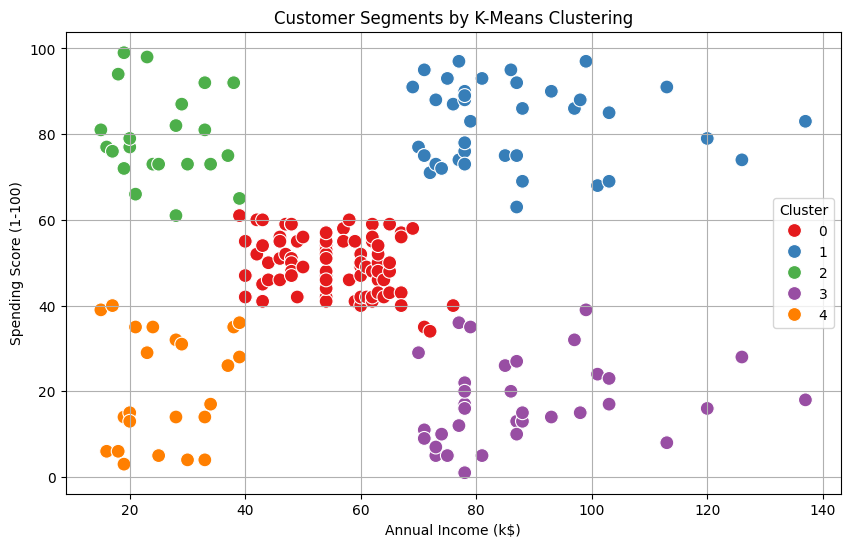


Cluster Centers (original scale):
Cluster 0: Income = 55.30, Spending Score = 49.52
Cluster 1: Income = 86.54, Spending Score = 82.13
Cluster 2: Income = 25.73, Spending Score = 79.36
Cluster 3: Income = 88.20, Spending Score = 17.11
Cluster 4: Income = 26.30, Spending Score = 20.91


In [1]:
# K-Means Clustering on Mall Customer Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Step 2: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Optional - scale features (KMeans is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 5: Apply K-Means with optimal k (e.g., k=5 based on elbow curve)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title('Customer Segments by K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 7: Optional - analyze cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (original scale):")
for idx, center in enumerate(centers):
    print(f"Cluster {idx}: Income = {center[0]:.2f}, Spending Score = {center[1]:.2f}")
